In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt


In [25]:
# Load csv data from the local path
df_rainfall = pd.read_csv(r'C:\Users\Nekky Lung\Desktop\IronHack AI Course\2_FT_July2025\week3\day5_Project2\project2\Rainfall_Data_Germany_Complete.csv')

# basic info
df_rainfall.value_counts()

City        Latitude  Longitude  Month  Year  Rainfall (mm)  Elevation (m)  Climate_Type  Temperature (??C)  Humidity (%)
Berlin      52.5200   13.4050    1      2015  71.56          34             Oceanic        19.6              72              1
Hanover     52.3759   9.7320     9      2020  159.19         55             Oceanic        0.5               93              1
                                 8      2015  97.57          55             Oceanic        21.5              93              1
                                        2016  172.44         55             Oceanic        1.8               39              1
                                        2017  167.65         55             Oceanic        19.2              80              1
                                                                                                                            ..
Dusseldorf  51.2277   6.7735     5      2020  13.39          38             Oceanic        3.1               53     

In [26]:
#data summary
df_rainfall.info()

df_rainfall.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1080 non-null   object 
 1   Latitude           1080 non-null   float64
 2   Longitude          1080 non-null   float64
 3   Month              1080 non-null   int64  
 4   Year               1080 non-null   int64  
 5   Rainfall (mm)      1080 non-null   float64
 6   Elevation (m)      1080 non-null   int64  
 7   Climate_Type       1080 non-null   object 
 8   Temperature (??C)  1080 non-null   float64
 9   Humidity (%)       1080 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 76.0+ KB


,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (??C),Humidity (%)
count,1080,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080,1080.000000,1080.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,Oceanic,NaN,NaN
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,648,NaN,NaN
mean,NaN,51.002410,10.242190,6.500000,2019.000000,99.211787,127.20000,NaN,14.724259,65.153704
std,NaN,1.576498,2.351316,3.453652,2.583185,57.560449,145.90981,NaN,11.433380,20.303775
min,NaN,48.135100,6.773500,1.000000,2015.000000,0.000000,6.00000,NaN,-5.000000,30.000000
25%,NaN,50.110900,8.682100,3.750000,2017.000000,49.500000,37.00000,NaN,4.975000,47.000000
50%,NaN,51.139050,9.862850,6.500000,2019.000000,99.425000,83.50000,NaN,14.850000,66.000000
75%,NaN,52.375900,12.373100,9.250000,2021.000000,149.527500,113.00000,NaN,24.300000,83.000000


Use .columns , .head(), .shape and .info() to get a feel for the data structure.
Use .isnull(), .duplicated(), .value_counts(), df.describe(include="all") and .unique() to:

Identify missing values:  
identify where your data might be incomplete (df.isnull().sum())
decide whether you want to drop them - .dropna() - or fill them - .fillna()

Check for duplicates:
Duplicates (full rows) - avoid repeated data entries (df.duplicated().sum())
Duplicates in key columns - check for duplicates in fields that should be unique (e.g., user ID, transaction ID)

Data types:.info()
make sure columns are correctly typed (df.dtypes)

Understand distributions of categorical and numerical data :
Number of unique values per column (df.nunique()) - helps identify which columns are likely categorical
If a column has only a handful of unique values compared to the number of rows, it likely represents a category, not a continuous variable.

Spot unusual values or incorrect data types:
Invalid or extreme values (e.g., negative ages or impossible prices) 
- these can often be spotted in the output of: df.describe(include="all")


Use basic visualizations to identify patterns and outliers

Assess the quality of your dataset by checking for missing values, inconsistencies, and potential errors. 
Clean and preprocess the data as needed to ensure reliable analysis. 
You can also decide which columns to keep or drop to move forward with your analysis.
Be sure to document any data issues you find and explain the steps you took to fix them.

Data Quality Analysis

In [27]:
#Understand distributions of categorical and numerical data :
df_rainfall.nunique()

City                   10
Latitude               10
Longitude              10
Month                  12
Year                    9
Rainfall (mm)        1038
Elevation (m)           9
Climate_Type            2
Temperature (??C)     372
Humidity (%)           70
dtype: int64

In [28]:
# Define and correct the columns
desired_columns = ['City', 'Latitude', 'Longitude', 'Month', 'Year', 
                      'Rainfall (mm)', 'Elevation (m)', 'Climate_Type', 
                      'Temperature (°C)', 'Humidity (%)']

# checks the missing value
df_rainfall.isnull() 

missing = df_rainfall.isnull().sum()
if missing.sum() > 0:
    print(f"\nMissing Values:")
    print(missing[missing > 0])
else:
    print(f"\nMissing values: {missing}")




Missing values: City                 0
Latitude             0
Longitude            0
Month                0
Year                 0
Rainfall (mm)        0
Elevation (m)        0
Climate_Type         0
Temperature (??C)    0
Humidity (%)         0
dtype: int64


In [29]:
#check the duplication of each row
df_rainfall.duplicated()

# Duplicates - only check if all required columns exist
if all(col in df_rainfall.columns for col in ['City', 'Year', 'Month','Rainfall (mm)','Climate_Type','Temperature (??C)', 'Humidity (%)']):
    duplicates = df_rainfall.duplicated(subset=['City', 'Year', 'Month','Rainfall (mm)','Climate_Type','Temperature (??C)', 'Humidity (%)']).sum()
    print(f"\nDuplicate records: {duplicates}")
    

# Validity checks - only for columns with valid numerical values
print("\nValidity Checks:")
if 'Rainfall (mm)' in df_rainfall.columns:
    print(f"  Invalid rainfall: {(df_rainfall['Rainfall (mm)'] < 0).sum()}")
if 'Year' in df_rainfall.columns:
    print(f"  Invalid Year: {((df_rainfall['Year'] <2000 ) | (df_rainfall['Year'] > 2025)).sum()}")
if 'Month' in df_rainfall.columns:
    print(f"  Invalid months: {((df_rainfall['Month'] < 1) | (df_rainfall['Month'] > 12)).sum()}")


Duplicate records: 0

Validity Checks:
  Invalid rainfall: 0
  Invalid Year: 0
  Invalid months: 0


In [30]:
# Basic statistics - only for numeric columns that exist
numeric_cols = ['Rainfall (mm)', 'Temperature (??C)', 'Humidity (%)']
available_numeric = [col for col in numeric_cols if col in df_rainfall.columns]
    
if available_numeric:
    print(f"\nKey Statistics:")
    stats = df_rainfall[available_numeric].describe()
    print(stats.loc[['mean', 'std', 'min', 'max']].round(2))


Key Statistics:
      Rainfall (mm)  Temperature (??C)  Humidity (%)
mean          99.21              14.72         65.15
std           57.56              11.43         20.30
min            0.00              -5.00         30.00
max          199.91              34.90         99.00


In [31]:
# Save cleaned data
df_rainfall.to_csv("Rainfall_Cleaned.csv", index=False)

Start cleaning:
Drop unnecessary columns
Keep only the variables that help you answer your research questions.
If a column like an ID is unique and not used in your analysis, 
consider setting it as the index (e.g., df.set_index("user_id")) instead of dropping it.

Handle missing values
Decide on a strategy based on the column’s importance and the amount of missing data:
Drop rows or columns (df.dropna())
Fill in values with mean, median, mode, or a placeholder (df.fillna())
Or keep them (if missingness itself tells you something!)

Handle duplicates
Remove fully duplicated rows with (df.drop_duplicates())

Convert column types where needed
Use (pd.to_datetime()) for date fields
Use (.astype()) to fix numeric or categorical types

Fix or remove invalid values
Decide whether to correct, remove, or flag them based on your analysis goals

DON'T FORGET TO: Document your cleaning process!

Write explanations in Markdown cells as you go
This makes your notebook readable and explains your decision-making clearly.

AND FINALLY: Save your cleaned dataset as a new CSV file:
df.to_csv("cleaned_data.csv", index=False)
(You will be using this cleaned dataset in SQL later on)

EDA:
You are now done with Data Cleaning and ready to proceed to EDA!
Follow your Univariate and Bivariate lesson notebooks to guide your process.

Step 1: Identify Variable Types, Classify your columns into:

>Numerical variables (e.g., age, income)

>Categorical variables (e.g., gender, country)
This classification determines what types of plots and summary statistics you’ll use.

Step 2: Univariate EDA (One Variable at a Time)
Now, explore each variable individually - but only the ones relevant to your goal.

>For numerical variables:
Use ().describe()) for summary stats.
Visualize distributions with histograms or boxplots.

>For categorical variables:
Use .value_counts() to see frequency counts.
Visualize with bar plots (or pie charts, if you must).
This step helps you understand the shape, spread, and patterns in your key variables.

Exploratory Data Analysis EDA


In [32]:
#Understand distributions of categorical and numerical data :
df_rainfall.nunique()

City                   10
Latitude               10
Longitude              10
Month                  12
Year                    9
Rainfall (mm)        1038
Elevation (m)           9
Climate_Type            2
Temperature (??C)     372
Humidity (%)           70
dtype: int64

what can be used? :
skewness?  kurtosis? chi-square test? frequency heat map? crosstab? cramer's V? 
box plots? correlation_matrix ? scatter plot? histogram?  QQplot? or others?

EDA1: Annual Rainfall Patterns by Climate Type

In [34]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt

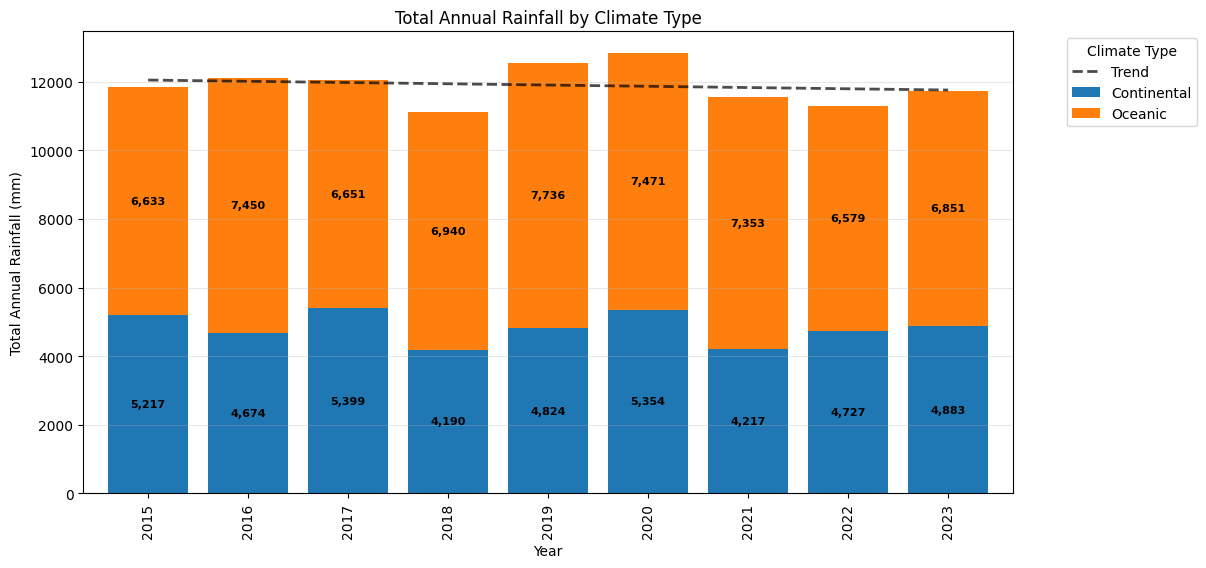

In [35]:
# Read and process data
df_cleaned = pd.read_csv('Rainfall_Cleaned.csv')

# Calculate annual rainfall per city
city_annual = df_cleaned.groupby(['City', 'Year', 'Climate_Type'])['Rainfall (mm)'].sum().reset_index()

# Calculate total rainfall per climate type per year (for stacked bar)
climate_total = city_annual.groupby(['Climate_Type', 'Year'])['Rainfall (mm)'].sum().reset_index()

# Pivot the data for stacked bar chart
climate_pivot = climate_total.pivot(index='Year', columns='Climate_Type', values='Rainfall (mm)').fillna(0)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
climate_pivot.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Add value labels on bars (only for bars with significant height)
for i, climate in enumerate(climate_pivot.columns):
    for j, value in enumerate(climate_pivot[climate]):
        if value > 1000:  # Only label if rainfall > 1000mm
            # Calculate position
            y_pos = sum(climate_pivot.iloc[j, :i]) + value/2
            ax.text(j, y_pos, f'{value:,.0f}',
                    ha='center', va='center', fontsize=8, fontweight='bold')

# Prepare data for the trend line (total rainfall per year)
total_by_year = climate_pivot.sum(axis=1).values  # Sum of all climate types for each year
x = climate_pivot.index.values  # Years (x-axis)

# Total rainfall per year
total_by_year = climate_pivot.sum(axis=1).values

# Use integer x positions for bar chart
x_pos = np.arange(len(climate_pivot.index))

# Fit and plot trend line
z = np.polyfit(x_pos, total_by_year, 1)
p = np.poly1d(z)
ax.plot(x_pos, p(x_pos), "k--", alpha=0.7, linewidth=2, label='Trend')


# Customize plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Annual Rainfall (mm)')
ax.set_title('Total Annual Rainfall by Climate Type')
ax.legend(title='Climate Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')

# Save outputs
plt.savefig('rainfall_stacked_bar_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# Export data
climate_pivot.to_csv('rainfall_stacked_data.csv')



EDA 2:Seasonal Rainfall Variations

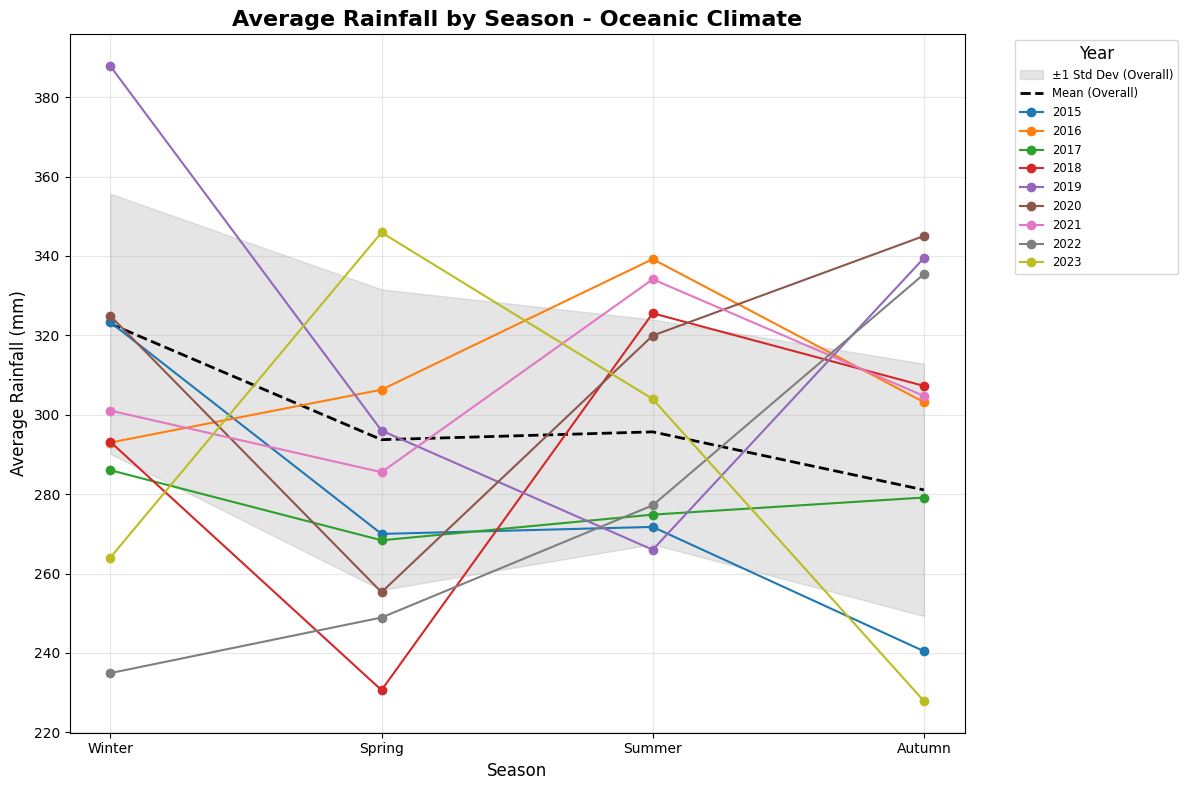

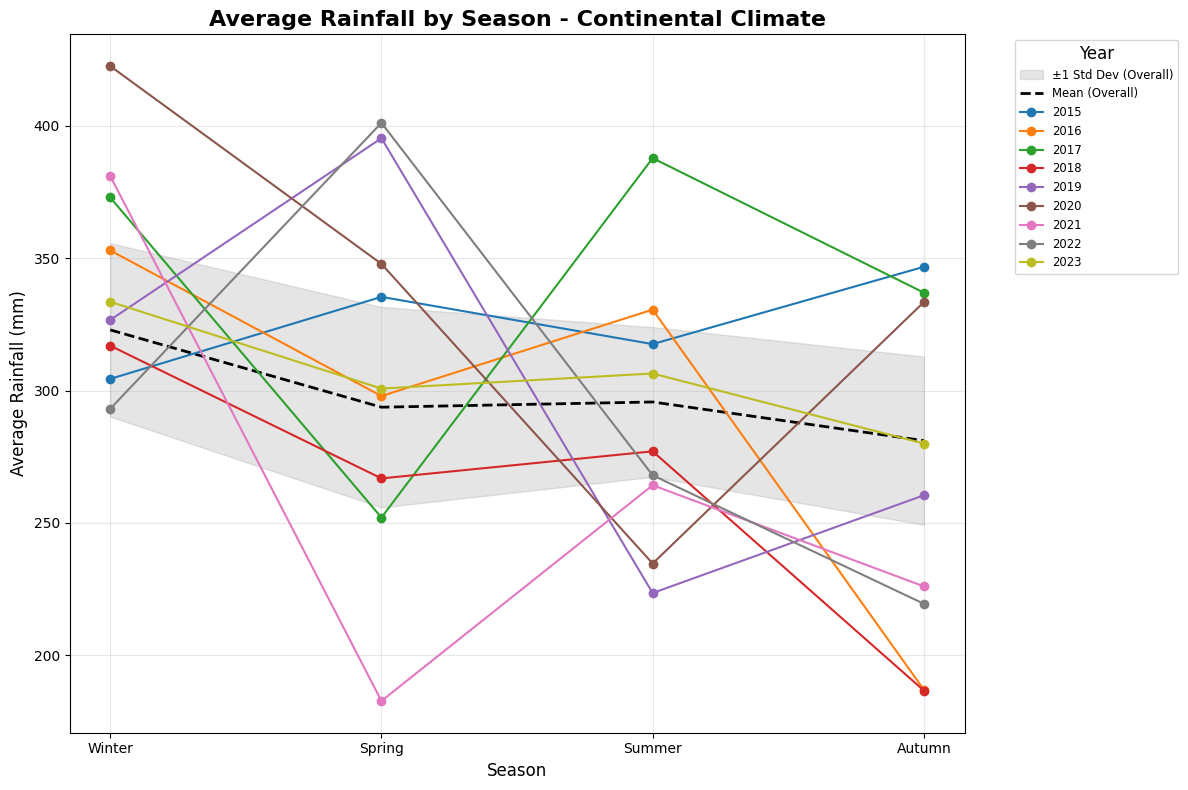

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Rainfall_Cleaned.csv')

# Map months to seasons
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}
df['Season'] = df['Month'].map(season_map)

# Calculate total rainfall by city, climate type, year, and season
city_totals = df.groupby(['Climate_Type', 'City', 'Year', 'Season'])['Rainfall (mm)'].sum().reset_index()

# Calculate average rainfall per climate type
climate_avg = []
for climate in df['Climate_Type'].unique():
    climate_data = city_totals[city_totals['Climate_Type'] == climate]
    n_cities = climate_data['City'].nunique()
    
    avg = climate_data.groupby(['Year', 'Season'])['Rainfall (mm)'].sum().reset_index()
    avg['Avg_Rainfall (mm)'] = avg['Rainfall (mm)'] / n_cities
    avg['Climate_Type'] = climate
    climate_avg.append(avg)

# Combine into one DataFrame
final_data = pd.concat(climate_avg, ignore_index=True)

# Define season order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
climate_types = df['Climate_Type'].unique()[:2]  # First 2 climate types

# Calculate overall mean and std across all climate types for comparison
pivot = final_data.pivot_table(index='Season', columns='Year', values='Avg_Rainfall (mm)', aggfunc='mean').reindex(season_order)
mean_rainfall = pivot.mean(axis=1)
std_rainfall = pivot.std(axis=1)

# Plot for each climate type
for i, climate in enumerate(climate_types):
    plt.figure(figsize=(12, 8))
    climate_data = final_data[final_data['Climate_Type'] == climate]
    
    # Add shaded region for ±1 Std Dev (calculated from overall data)
    plt.fill_between(season_order,
                     mean_rainfall - std_rainfall,
                     mean_rainfall + std_rainfall,
                     color='gray', alpha=0.2, label='±1 Std Dev (Overall)')
    
    # Add mean line (calculated from overall data)
    plt.plot(season_order, mean_rainfall, color='black', linestyle='--', linewidth=2, label='Mean (Overall)')
    
    # Plot each year as a separate line
    for year in sorted(climate_data['Year'].unique()):
        year_data = climate_data[climate_data['Year'] == year]
        
        # Ensure all seasons are present
        plot_data = []
        for season in season_order:
            season_val = year_data[year_data['Season'] == season]['Avg_Rainfall (mm)'].values
            plot_data.append(season_val[0] if len(season_val) > 0 else 0)
        
        plt.plot(season_order, plot_data, marker='o', label=f'{year}', linewidth=1.5)
    
    plt.title(f'Average Rainfall by Season - {climate} Climate', fontsize=16, fontweight='bold')
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Rainfall (mm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Adjust the legend
    plt.legend(
        title='Year',
        fontsize='small',
        loc='upper left',
        bbox_to_anchor=(1.05, 1),
        title_fontsize='large'
    )
    
    plt.tight_layout()
    
    # Save as PNG
    plt.savefig(f'{climate}_climate_rainfall.png', dpi=300, bbox_inches='tight')
    plt.show()

EDA 3:Drought Index Calculation - Standardized Precipitation Index (SPI)

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('Rainfall_Cleaned.csv')
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df = df.sort_values(['City', 'Date'])

# Initialize results list to store all data
all_results = []

# Time scales to calculate (in months)
time_scales = [1, 3, 6, 12]

# Get all cities
cities = df['City'].unique()

# Calculate SPI for each city
for city in cities:
    print(f"Processing {city}...")
    city_data = df[df['City'] == city].copy()
    
    # Ensure continuous monthly sequence
    city_data = city_data.set_index('Date')
    
    # Get city metadata (constant values)
    lat = city_data['Latitude'].iloc[0]
    lon = city_data['Longitude'].iloc[0]
    climate_type = city_data['Climate_Type'].iloc[0]
    elevation = city_data['Elevation (m)'].iloc[0]
    
    # Calculate SPI for each time scale
    spi_results = {}
    
    for scale_months in time_scales:
        # Calculate rolling sum for the specified scale
        rainfall_sum = city_data['Rainfall (mm)'].rolling(window=scale_months, min_periods=scale_months).sum()
        
        # Remove NaN values for fitting
        valid_data = rainfall_sum.dropna()
        
        if len(valid_data) < 30:  # Need at least 30 data points for reliable fitting
            spi_values = pd.Series(np.nan, index=city_data.index)
        else:
            # Fit gamma distribution to the precipitation data
            # Remove zeros for gamma fitting
            non_zero_data = valid_data[valid_data > 0]
            
            if len(non_zero_data) < 10:
                spi_values = pd.Series(np.nan, index=city_data.index)
            else:
                # Fit gamma distribution
                alpha, loc, beta = stats.gamma.fit(non_zero_data, floc=0)
                
                # Calculate probability of zero precipitation
                prob_zero = len(valid_data[valid_data == 0]) / len(valid_data)
                
                # Calculate SPI values
                spi_list = []
                
                for value in rainfall_sum:
                    if pd.isna(value):
                        spi_list.append(np.nan)
                    elif value == 0:
                        # For zero precipitation, use the probability of zero
                        prob = prob_zero
                        spi_list.append(stats.norm.ppf(prob))
                    else:
                        # For positive precipitation, use gamma CDF adjusted for probability of zero
                        prob = prob_zero + (1 - prob_zero) * stats.gamma.cdf(value, alpha, loc=loc, scale=beta)
                        # Ensure probability is within valid range
                        prob = np.clip(prob, 0.0001, 0.9999)
                        spi_list.append(stats.norm.ppf(prob))
                
                spi_values = pd.Series(spi_list, index=city_data.index)
        
        spi_results[f'SPI_{scale_months}M'] = spi_values
    
    # Create rows for each date
    for idx in range(len(city_data)):
        row_data = {
            'City': city,
            'Latitude': lat,
            'Longitude': lon,
            'Date': city_data.index[idx],
            'Year': city_data.index[idx].year,
            'Month': city_data.index[idx].month,
            'Month_Name': city_data.index[idx].strftime('%B'),
            'Climate_Type': climate_type,
            'Elevation_m': elevation,
            'Rainfall_mm': city_data['Rainfall (mm)'].iloc[idx],
            'Temperature_C': city_data['Temperature (??C)'].iloc[idx],
            'Humidity_pct': city_data['Humidity (%)'].iloc[idx],
            'SPI_1M': spi_results['SPI_1M'].iloc[idx],
            'SPI_3M': spi_results['SPI_3M'].iloc[idx],
            'SPI_6M': spi_results['SPI_6M'].iloc[idx],
            'SPI_12M': spi_results['SPI_12M'].iloc[idx]
        }
        all_results.append(row_data)

# Create final dataframe
result_df = pd.DataFrame(all_results)

# Add SPI classification columns
def classify_spi(spi_value):
    if pd.isna(spi_value):
        return 'No Data'
    elif spi_value >= 2.0:
        return 'Extremely Wet'
    elif spi_value >= 1.5:
        return 'Very Wet'
    elif spi_value >= 1.0:
        return 'Moderately Wet'
    elif spi_value >= 0.5:
        return 'Slightly Wet'
    elif spi_value >= -0.5:
        return 'Near Normal'
    elif spi_value >= -1.0:
        return 'Slightly Dry'
    elif spi_value >= -1.5:
        return 'Moderately Dry'
    elif spi_value >= -2.0:
        return 'Severely Dry'
    else:
        return 'Extremely Dry'

for scale in [1, 3, 6, 12]:
    class_col = f'SPI_{scale}M_Class'
    result_df[class_col] = result_df[f'SPI_{scale}M'].apply(classify_spi)

# Add additional fields and save
result_df['Year_Month'] = result_df['Year'].astype(str) + '-' + result_df['Month'].astype(str).str.zfill(2)
result_df['Drought_Intensity'] = result_df['SPI_1M'].apply(lambda x: max(-x, 0) if not pd.isna(x) else 0)
result_df['Wetness_Intensity'] = result_df['SPI_1M'].apply(lambda x: max(x, 0) if not pd.isna(x) else 0)


# Create Tableau-optimized output
result_df['Year_Month'] = result_df['Year'].astype(str) + '-' + result_df['Month'].astype(str).str.zfill(2)
result_df['Date_String'] = result_df['Date'].dt.strftime('%Y-%m-%d')

# Add drought intensity score (for color coding on map)
result_df['Drought_Intensity'] = result_df['SPI_1M'].apply(lambda x: max(-x, 0) if not pd.isna(x) else 0)
result_df['Wetness_Intensity'] = result_df['SPI_1M'].apply(lambda x: max(x, 0) if not pd.isna(x) else 0)

# Save main file
try:
    result_df.to_csv('spi_tableau_data.csv', index=False)
    print("Data successfully saved to spi_tableau_data.csv")
except PermissionError:
    print("Permission denied. Trying alternative filename...")
    result_df.to_csv('spi_tableau_data_alt.csv', index=False)
    print("Data successfully saved to spi_tableau_data_alt.csv")

###################################################
# Create summary statistics
try:
    summary = result_df.groupby(['City', 'Year']).agg({
        'Rainfall_mm': ['sum', 'mean', 'std'],
        'SPI_1M': ['mean', 'min', 'max'],
        'SPI_3M': ['mean', 'min', 'max'],
        'SPI_6M': ['mean', 'min', 'max'],
        'SPI_12M': ['mean', 'min', 'max']
    }).round(2)
    
    summary.to_csv('spi_annual_summary.csv')
    print("Summary statistics saved to spi_annual_summary.csv")
except Exception as e:
    print(f"Could not create summary file: {e}")

# Display summary statistics
print("\nSPI Summary Statistics:")
print("=" * 50)

for scale in [1, 3, 6, 12]:
    spi_col = f'SPI_{scale}M'
    class_col = f'SPI_{scale}M_Class'
    
    print(f"\n{scale}-Month SPI Distribution:")
    print(result_df[class_col].value_counts().sort_index())
    
    print(f"\n{scale}-Month SPI Statistics:")
    print(result_df[spi_col].describe().round(3))

# Drought/Wet conditions by city
print("\nDrought Conditions by City (SPI-12):")
drought_summary = result_df[result_df['SPI_12M'] < -1.0].groupby('City').size().sort_values(ascending=False)
print(drought_summary.head(10))  # Show top 10

print("\nAnalysis complete!")
print(f"\nFinal dataset contains {len(result_df)} rows")
print(f"Cities analyzed: {', '.join(result_df['City'].unique())}")

Processing Berlin...
Processing Cologne...
Processing Dresden...
Processing Dusseldorf...
Processing Frankfurt...
Processing Hamburg...
Processing Hanover...
Processing Leipzig...
Processing Munich...
Processing Stuttgart...
Data successfully saved to spi_tableau_data.csv
Summary statistics saved to spi_annual_summary.csv

SPI Summary Statistics:

1-Month SPI Distribution:
Extremely Dry      49
Moderately Dry     61
Moderately Wet    165
Near Normal       355
Severely Dry       54
Slightly Dry      122
Slightly Wet      274
Name: SPI_1M_Class, dtype: int64

1-Month SPI Statistics:
count    1080.000
mean        0.023
std         0.994
min        -3.719
25%        -0.562
50%         0.252
75%         0.819
max         1.405
Name: SPI_1M, dtype: float64

3-Month SPI Distribution:
Extremely Dry      35
Extremely Wet       5
Moderately Dry     83
Moderately Wet    116
Near Normal       399
No Data            20
Severely Dry       52
Slightly Dry      137
Slightly Wet      188
Very Wet      

Visualization(html) for EDA 3:Drought Index Calculation - Standardized Precipitation Index (SPI) (helped with Claude)

In [38]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from datetime import datetime
import requests
import json
import warnings
warnings.filterwarnings('ignore')

def create_comprehensive_dashboard():
    """Create a comprehensive interactive dashboard in a single HTML file"""
    
    # Load data
    df = pd.read_csv('spi_tableau_data.csv')
    df['Date'] = pd.to_datetime(df['Date_String'])
    
    print("Creating comprehensive SPI dashboard...")
    print(f"Dataset: {len(df)} records for {len(df['City'].unique())} cities")
    print(f"Time period: {df['Date'].min().strftime('%Y-%m')} to {df['Date'].max().strftime('%Y-%m')}")
    
    # Get basic info for the dashboard
    cities = sorted(df['City'].unique().tolist())
    years = sorted([int(year) for year in df['Year'].unique()])
    dates = sorted(df['Date'].unique())
    
    # Get Germany boundaries
    germany_geojson = get_germany_boundaries()
    
    # Create base map centered on Germany
    germany_center = [51.1657, 10.4515]
    m = folium.Map(location=germany_center, zoom_start=6, tiles='OpenStreetMap')
    
    # Add Germany boundaries if available
    if germany_geojson is not None:
        folium.GeoJson(
            germany_geojson,
            style_function=lambda feature: {
                'fillColor': 'transparent',
                'color': 'black',
                'weight': 2,
                'fillOpacity': 0
            }
        ).add_to(m)
    
    # Prepare data for different visualizations
    # 1. Time series data for all combinations
    time_series_data = {}
    for scale in ['1M', '3M', '6M', '12M']:
        time_series_data[scale] = []
        for date in dates:
            date_pd = pd.to_datetime(date)
            date_data = df[df['Date'] == date].copy()
            daily_data = []
            for _, row in date_data.iterrows():
                spi_value = row[f'SPI_{scale}']
                if not pd.isna(spi_value):
                    daily_data.append({
                        'lat': float(row['Latitude']),
                        'lng': float(row['Longitude']),
                        'city': str(row['City']),
                        'spi': float(spi_value),
                        'rainfall': float(row['Rainfall_mm']) if not pd.isna(row['Rainfall_mm']) else None,
                        'temperature': float(row['Temperature_C']) if not pd.isna(row['Temperature_C']) else None,
                        'humidity': float(row['Humidity_pct']) if not pd.isna(row['Humidity_pct']) else None,
                        'elevation': int(row['Elevation_m']),
                        'climate': str(row['Climate_Type'])
                    })
            time_series_data[scale].append({
                'date': date_pd.strftime('%Y-%m'),
                'data': daily_data
            })
    
    # 2. Summary data for different aggregations
    summary_data = {}
    for scale in ['1M', '3M', '6M', '12M']:
        # Overall summary
        overall = df.groupby('City').agg({
            'Latitude': 'first',
            'Longitude': 'first',
            f'SPI_{scale}': 'mean',
            'Climate_Type': 'first',
            'Elevation_m': 'first',
            'Rainfall_mm': 'mean',
            'Temperature_C': 'mean',
            'Humidity_pct': 'mean'
        }).reset_index()
        
        summary_data[f'{scale}_overall'] = []
        for _, row in overall.iterrows():
            summary_data[f'{scale}_overall'].append({
                'city': str(row['City']),
                'lat': float(row['Latitude']),
                'lng': float(row['Longitude']),
                'spi': float(row[f'SPI_{scale}']) if not pd.isna(row[f'SPI_{scale}']) else None,
                'rainfall': float(row['Rainfall_mm']) if not pd.isna(row['Rainfall_mm']) else None,
                'temperature': float(row['Temperature_C']) if not pd.isna(row['Temperature_C']) else None,
                'humidity': float(row['Humidity_pct']) if not pd.isna(row['Humidity_pct']) else None,
                'elevation': int(row['Elevation_m']),
                'climate': str(row['Climate_Type'])
            })
        
        # Yearly summaries
        for year in years:
            yearly = df[df['Year'] == year].groupby('City').agg({
                'Latitude': 'first',
                'Longitude': 'first',
                f'SPI_{scale}': 'mean',
                'Climate_Type': 'first',
                'Elevation_m': 'first',
                'Rainfall_mm': 'mean',
                'Temperature_C': 'mean',
                'Humidity_pct': 'mean'
            }).reset_index()
            
            summary_data[f'{scale}_{year}'] = []
            for _, row in yearly.iterrows():
                summary_data[f'{scale}_{year}'].append({
                    'city': str(row['City']),
                    'lat': float(row['Latitude']),
                    'lng': float(row['Longitude']),
                    'spi': float(row[f'SPI_{scale}']) if not pd.isna(row[f'SPI_{scale}']) else None,
                    'rainfall': float(row['Rainfall_mm']) if not pd.isna(row['Rainfall_mm']) else None,
                    'temperature': float(row['Temperature_C']) if not pd.isna(row['Temperature_C']) else None,
                    'humidity': float(row['Humidity_pct']) if not pd.isna(row['Humidity_pct']) else None,
                    'elevation': int(row['Elevation_m']),
                    'climate': str(row['Climate_Type'])
                })
    
    # 3. Heatmap data
    heatmap_data = {}
    for scale in ['1M', '3M', '6M', '12M']:
        heat_data = []
        for date in dates:
            date_data = df[df['Date'] == date].copy()
            daily_data = []
            for _, row in date_data.iterrows():
                spi_value = row[f'SPI_{scale}']
                if not pd.isna(spi_value):
                    intensity = min(abs(float(spi_value)) * 15, 100)
                    daily_data.append([float(row['Latitude']), float(row['Longitude']), float(intensity)])
            heat_data.append(daily_data)
        
        heatmap_data[scale] = {
            'data': heat_data,
            'index': [pd.to_datetime(date).strftime('%Y-%m') for date in dates]
        }
    
    # Create comprehensive JavaScript for the interactive dashboard
    dashboard_js = f"""
    <script>
    // Data for the dashboard
    var timeSeriesData = {json.dumps(time_series_data)};
    var summaryData = {json.dumps(summary_data)};
    var heatmapData = {json.dumps(heatmap_data)};
    var cities = {json.dumps(cities)};
    var years = {json.dumps(years)};
    
    // Map instance
    var map;
    var currentMarkers = [];
    var currentHeatmap = null;
    var currentFeatureGroups = [];
    
    // Initialize map
    function initializeMap() {{
        map = L.map('map').setView([51.1657, 10.4515], 6);
        L.tileLayer('https://{{s}}.tile.openstreetmap.org/{{z}}/{{x}}/{{y}}.png', {{
            attribution: '© OpenStreetMap contributors'
        }}).addTo(map);
        
        // Add Germany boundaries if available
        {f'L.geoJSON({json.dumps(germany_geojson)}).addTo(map);' if germany_geojson else ''}
    }}
    
    // Color functions
    function getSPIColor(spiValue) {{
        if (spiValue === null || spiValue === undefined) return '#808080';
        if (spiValue >= 2.0) return '#000080';
        if (spiValue >= 1.5) return '#0000CD';
        if (spiValue >= 1.0) return '#4169E1';
        if (spiValue >= 0.5) return '#87CEEB';
        if (spiValue >= -0.5) return '#98FB98';
        if (spiValue >= -1.0) return '#FFE4B5';
        if (spiValue >= -1.5) return '#F4A460';
        if (spiValue >= -2.0) return '#CD5C5C';
        return '#8B0000';
    }}
    
    function classifySPI(spiValue) {{
        if (spiValue === null || spiValue === undefined) return 'No Data';
        if (spiValue >= 2.0) return 'Extremely Wet';
        if (spiValue >= 1.5) return 'Very Wet';
        if (spiValue >= 1.0) return 'Moderately Wet';
        if (spiValue >= 0.5) return 'Slightly Wet';
        if (spiValue >= -0.5) return 'Near Normal';
        if (spiValue >= -1.0) return 'Slightly Dry';
        if (spiValue >= -1.5) return 'Moderately Dry';
        if (spiValue >= -2.0) return 'Severely Dry';
        return 'Extremely Dry';
    }}
    
    // Clear current visualization
    function clearVisualization() {{
        currentMarkers.forEach(marker => map.removeLayer(marker));
        currentMarkers = [];
        
        if (currentHeatmap) {{
            map.removeLayer(currentHeatmap);
            currentHeatmap = null;
        }}
        
        currentFeatureGroups.forEach(fg => map.removeLayer(fg));
        currentFeatureGroups = [];
    }}
    
    // Update visualization based on controls
    function updateVisualization() {{
        clearVisualization();
        
        var vizType = document.getElementById('vizType').value;
        var spiScale = document.getElementById('spiScale').value;
        var timeType = document.getElementById('timeType').value;
        var yearFilter = document.getElementById('yearFilter').value;
        
        if (vizType === 'markers') {{
            if (timeType === 'timeseries') {{
                showTimeSeries(spiScale);
            }} else {{
                showSummary(spiScale, yearFilter);
            }}
        }} else if (vizType === 'heatmap') {{
            showHeatmap(spiScale);
        }}
    }}
    
    // Show time series with layer control
    function showTimeSeries(spiScale) {{
        var data = timeSeriesData[spiScale];
        var layerControl = L.control.layers(null, null, {{collapsed: false}}).addTo(map);
        
        data.forEach((timePoint, index) => {{
            var layerGroup = L.layerGroup();
            var isLastLayer = index === data.length - 1;
            
            timePoint.data.forEach(point => {{
                var color = getSPIColor(point.spi);
                var classification = classifySPI(point.spi);
                var radius = point.spi ? Math.min(Math.max(Math.abs(point.spi) * 2 + 6, 6), 15) : 6;
                
                var popupContent = `
                    <div style="font-family: Arial; font-size: 12px;">
                        <b style="font-size: 14px;">${{point.city}}</b><br>
                        <b>Date:</b> ${{timePoint.date}}<br>
                        <b>SPI-${{spiScale}}:</b> ${{point.spi ? point.spi.toFixed(2) : 'No Data'}}<br>
                        <b>Classification:</b> ${{classification}}<br>
                        <b>Rainfall:</b> ${{point.rainfall ? point.rainfall.toFixed(1) + ' mm' : 'No Data'}}<br>
                        <b>Temperature:</b> ${{point.temperature ? point.temperature.toFixed(1) + '°C' : 'No Data'}}<br>
                        <b>Humidity:</b> ${{point.humidity ? point.humidity.toFixed(1) + '%' : 'No Data'}}<br>
                        <b>Elevation:</b> ${{point.elevation}} m<br>
                        <b>Climate:</b> ${{point.climate}}
                    </div>
                `;
                
                var marker = L.circleMarker([point.lat, point.lng], {{
                    radius: radius,
                    fillColor: color,
                    color: 'black',
                    weight: 1,
                    fillOpacity: 0.8
                }}).bindPopup(popupContent).bindTooltip(`${{point.city}}: ${{classification}}`);
                
                layerGroup.addLayer(marker);
            }});
            
            layerControl.addOverlay(layerGroup, timePoint.date);
            if (isLastLayer) {{
                layerGroup.addTo(map);
            }}
            currentFeatureGroups.push(layerGroup);
        }});
        
        currentFeatureGroups.push(layerControl);
    }}
    
    // Show summary data
    function showSummary(spiScale, yearFilter) {{
        var dataKey = yearFilter === 'all' ? `${{spiScale}}_overall` : `${{spiScale}}_${{yearFilter}}`;
        var data = summaryData[dataKey];
        
        if (!data) return;
        
        data.forEach(point => {{
            var color = getSPIColor(point.spi);
            var classification = classifySPI(point.spi);
            var radius = point.spi ? Math.min(Math.max(Math.abs(point.spi) * 3 + 8, 8), 20) : 8;
            
            var popupContent = `
                <div style="font-family: Arial; font-size: 12px;">
                    <b style="font-size: 14px;">${{point.city}}</b><br>
                    <b>Average SPI-${{spiScale}}:</b> ${{point.spi ? point.spi.toFixed(2) : 'No Data'}}<br>
                    <b>Classification:</b> ${{classification}}<br>
                    <b>Avg Rainfall:</b> ${{point.rainfall ? point.rainfall.toFixed(1) + ' mm' : 'No Data'}}<br>
                    <b>Avg Temperature:</b> ${{point.temperature ? point.temperature.toFixed(1) + '°C' : 'No Data'}}<br>
                    <b>Avg Humidity:</b> ${{point.humidity ? point.humidity.toFixed(1) + '%' : 'No Data'}}<br>
                    <b>Climate:</b> ${{point.climate}}<br>
                    <b>Elevation:</b> ${{point.elevation}} m
                </div>
            `;
            
            var marker = L.circleMarker([point.lat, point.lng], {{
                radius: radius,
                fillColor: color,
                color: 'black',
                weight: 1,
                fillOpacity: 0.8
            }}).bindPopup(popupContent).bindTooltip(`${{point.city}}: ${{classification}}`);
            
            marker.addTo(map);
            currentMarkers.push(marker);
        }});
    }}
    
    // Show heatmap
    function showHeatmap(spiScale) {{
        var data = heatmapData[spiScale];
        
        currentHeatmap = L.heatLayer.heatmapWithTime(data.data, {{
            index: data.index,
            radius: 30,
            blur: 20,
            maxOpacity: 0.8,
            minOpacity: 0.1,
            gradient: {{0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1.0: 'red'}}
        }}).addTo(map);
    }}
    
    // Initialize everything when page loads
    document.addEventListener('DOMContentLoaded', function() {{
        initializeMap();
        updateVisualization();
        
        // Add event listeners to controls
        document.getElementById('vizType').addEventListener('change', updateVisualization);
        document.getElementById('spiScale').addEventListener('change', updateVisualization);
        document.getElementById('timeType').addEventListener('change', function() {{
            var yearControl = document.getElementById('yearFilter');
            yearControl.style.display = this.value === 'summary' ? 'inline-block' : 'none';
            updateVisualization();
        }});
        document.getElementById('yearFilter').addEventListener('change', updateVisualization);
    }});
    </script>
    """
    
    # Create the complete HTML
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Germany SPI Drought Analysis Dashboard</title>
        <meta charset="utf-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <link rel="stylesheet" href="https://unpkg.com/leaflet@1.7.1/dist/leaflet.css" />
        <script src="https://unpkg.com/leaflet@1.7.1/dist/leaflet.js"></script>
        <script src="https://cdn.jsdelivr.net/npm/leaflet.heat@0.2.0/dist/leaflet-heat.min.js"></script>
        <style>
            body {{
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }}
            .header {{
                background-color: #2c3e50;
                color: white;
                padding: 15px;
                text-align: center;
            }}
            .controls {{
                background-color: #ecf0f1;
                padding: 15px;
                border-bottom: 2px solid #bdc3c7;
                display: flex;
                flex-wrap: wrap;
                gap: 15px;
                align-items: center;
                justify-content: center;
            }}
            .control-group {{
                display: flex;
                flex-direction: column;
                align-items: center;
                gap: 5px;
            }}
            .control-group label {{
                font-weight: bold;
                font-size: 12px;
                color: #2c3e50;
            }}
            .control-group select, .control-group input {{
                padding: 8px;
                border: 1px solid #bdc3c7;
                border-radius: 4px;
                background-color: white;
                font-size: 14px;
            }}
            #map {{
                height: calc(100vh - 160px);
                width: 100%;
            }}
            .legend {{
                position: fixed;
                top: 160px;
                right: 10px;
                width: 200px;
                background-color: white;
                border: 2px solid grey;
                border-radius: 5px;
                padding: 10px;
                font-size: 12px;
                z-index: 1000;
                box-shadow: 0 0 15px rgba(0,0,0,0.2);
            }}
            .legend-item {{
                display: flex;
                align-items: center;
                margin: 3px 0;
            }}
            .legend-color {{
                width: 16px;
                height: 16px;
                border-radius: 50%;
                margin-right: 8px;
                border: 1px solid #333;
            }}
            .info-panel {{
                position: fixed;
                bottom: 10px;
                left: 10px;
                background-color: white;
                border: 2px solid grey;
                border-radius: 5px;
                padding: 10px;
                font-size: 12px;
                z-index: 1000;
                max-width: 300px;
                box-shadow: 0 0 15px rgba(0,0,0,0.2);
            }}
        </style>
    </head>
    <body>
        <div class="header">
            <h1>Germany SPI Drought Analysis Dashboard</h1>
            <p>Interactive visualization of Standardized Precipitation Index across German cities ({df['Date'].min().strftime('%Y-%m')} to {df['Date'].max().strftime('%Y-%m')})</p>
        </div>
        
        <div class="controls">
            <div class="control-group">
                <label for="vizType">Visualization Type:</label>
                <select id="vizType">
                    <option value="markers">City Markers</option>
                    <option value="heatmap">Heatmap Animation</option>
                </select>
            </div>
            
            <div class="control-group">
                <label for="spiScale">SPI Time Scale:</label>
                <select id="spiScale">
                    <option value="1M">SPI-1M (Monthly)</option>
                    <option value="3M">SPI-3M (Seasonal)</option>
                    <option value="6M">SPI-6M (Half-yearly)</option>
                    <option value="12M" selected>SPI-12M (Annual)</option>
                </select>
            </div>
            
            <div class="control-group">
                <label for="timeType">Time Analysis:</label>
                <select id="timeType">
                    <option value="timeseries">Time Series (All Months)</option>
                    <option value="summary" selected>Summary (Average)</option>
                </select>
            </div>
            
            <div class="control-group">
                <label for="yearFilter">Year Filter:</label>
                <select id="yearFilter" style="display: inline-block;">
                    <option value="all" selected>All Years Average</option>
                    {chr(10).join([f'<option value="{year}">{year}</option>' for year in years])}
                </select>
            </div>
        </div>
        
        <div id="map"></div>
        
        <div class="legend">
            <p style="margin-top:0; font-weight: bold;">SPI Classification</p>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #000080;"></div>
                <span>Extremely Wet (≥ 2.0)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #0000CD;"></div>
                <span>Very Wet (1.5 to 2.0)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #4169E1;"></div>
                <span>Moderately Wet (1.0 to 1.5)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #87CEEB;"></div>
                <span>Slightly Wet (0.5 to 1.0)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #98FB98;"></div>
                <span>Near Normal (-0.5 to 0.5)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #FFE4B5;"></div>
                <span>Slightly Dry (-1.0 to -0.5)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #F4A460;"></div>
                <span>Moderately Dry (-1.5 to -1.0)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #CD5C5C;"></div>
                <span>Severely Dry (-2.0 to -1.5)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #8B0000;"></div>
                <span>Extremely Dry (< -2.0)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #808080;"></div>
                <span>No Data</span>
            </div>
            <p style="margin-top: 10px; font-size: 10px; font-style: italic;">
                Marker size indicates SPI magnitude
            </p>
        </div>
        
        <div class="info-panel">
            <p style="margin-top: 0; font-weight: bold;">Dataset Information</p>
            <p><strong>Cities:</strong> {len(cities)} German cities</p>
            <p><strong>Time Period:</strong> {df['Date'].min().strftime('%Y-%m')} to {df['Date'].max().strftime('%Y-%m')}</p>
            <p><strong>Total Records:</strong> {len(df):,}</p>
            <p><strong>SPI Scales:</strong> 1M, 3M, 6M, 12M</p>
            <p style="font-size: 10px; font-style: italic; margin-bottom: 0;">
                Click markers for detailed information. Use controls above to change visualization.
            </p>
        </div>
        
        {dashboard_js}
    </body>
    </html>
    """
    
    return html_content

def get_germany_boundaries():
    """Get Germany administrative boundaries as GeoJSON"""
    try:
        url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/germany.geojson"
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            print("Successfully loaded Germany boundaries")
            return response.json()
    except:
        try:
            url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/4_niedrig.geo.json"
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                print("Successfully loaded Germany boundaries from alternative source")
                return response.json()
        except:
            pass
    
    print("Could not download Germany boundaries. Map will show without country borders.")
    return None

# Main execution
if __name__ == "__main__":
    # Create the comprehensive dashboard
    html_content = create_comprehensive_dashboard()
    
    # Save to file
    filename = 'germany_spi_comprehensive_dashboard.html'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(html_content)
    
    print(f"\n🎉 Comprehensive dashboard created successfully!")
    print(f"📁 File saved as: {filename}")
    print(f"🌐 Open this file in your browser to explore the interactive dashboard")
    print(f"\n📊 Dashboard Features:")
    print(f"   • Interactive controls for visualization type, SPI scale, and time period")
    print(f"   • City markers with detailed popups")
    print(f"   • Time series analysis with layer controls")
    print(f"   • Animated heatmaps")
    print(f"   • Summary views by year or overall average")
    print(f"   • Professional styling with legends and info panels")
    print(f"   • Responsive design that works on different screen sizes")

Creating comprehensive SPI dashboard...
Dataset: 1080 records for 10 cities
Time period: 2015-01 to 2023-12
Could not download Germany boundaries. Map will show without country borders.

🎉 Comprehensive dashboard created successfully!
📁 File saved as: germany_spi_comprehensive_dashboard.html
🌐 Open this file in your browser to explore the interactive dashboard

📊 Dashboard Features:
   • Interactive controls for visualization type, SPI scale, and time period
   • City markers with detailed popups
   • Time series analysis with layer controls
   • Animated heatmaps
   • Summary views by year or overall average
   • Professional styling with legends and info panels
   • Responsive design that works on different screen sizes
